## Full MNIST dataset for digit image classification

In [1]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
path.ls()

(#2) [Path('/home/mikes/.fastai/data/mnist_png/testing'),Path('/home/mikes/.fastai/data/mnist_png/training')]

In [4]:
(path/'training').ls()

(#11) [Path('/home/mikes/.fastai/data/mnist_png/training/0'),Path('/home/mikes/.fastai/data/mnist_png/training/9'),Path('/home/mikes/.fastai/data/mnist_png/training/4'),Path('/home/mikes/.fastai/data/mnist_png/training/7'),Path('/home/mikes/.fastai/data/mnist_png/training/1'),Path('/home/mikes/.fastai/data/mnist_png/training/export.pkl'),Path('/home/mikes/.fastai/data/mnist_png/training/5'),Path('/home/mikes/.fastai/data/mnist_png/training/3'),Path('/home/mikes/.fastai/data/mnist_png/training/2'),Path('/home/mikes/.fastai/data/mnist_png/training/6')...]

In [5]:
train_path = path/'training'
fnames = get_image_files(train_path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(train_path, fnames, label_func)

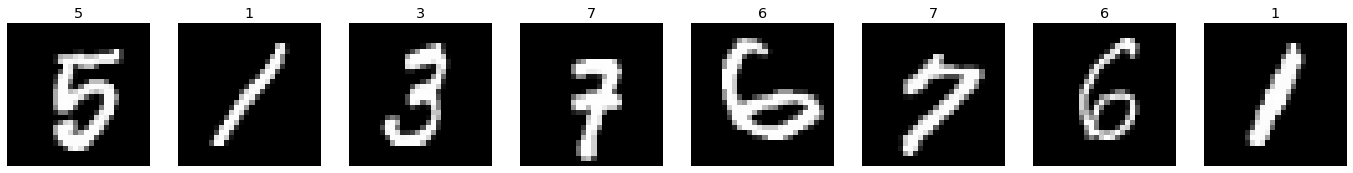

In [6]:
dls.train.show_batch(max_n=8, nrows=1)

In [7]:
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(4, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.528648,13.433999,0.752583,00:38
1,0.727949,3.551347,0.966083,00:36
2,0.172656,0.072227,0.985917,00:36
3,0.033061,62.739708,0.990000,00:36


In [22]:
learn.dls.vocab

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
a5 = PILImage.create((path/'testing'/'5').ls()[0])
a5

In [32]:
res = learn.predict(a5)
res

("['9', '5', '6', '0', '0', '9', '0', '9', '9', '0']",
 tensor([-1.1660, -5.5170, -4.4327,  0.1548,  0.4598,  9.4975,  0.7521, -1.3037, -1.3600,  0.6905]),
 tensor([-1.1660, -5.5170, -4.4327,  0.1548,  0.4598,  9.4975,  0.7521, -1.3037, -1.3600,  0.6905]))

In [33]:
a7 = PILImage.create((path/'testing'/'7').ls()[0])
a7

In [34]:
res = learn.predict(a7)
res

IndexError: list index out of range

In [37]:
def classify_digit(digit):
    _, _, probs = learn.predict(digit)
    labeled_probs = zip(range(0, 10), probs)
    return max(labeled_probs, key=lambda t: t[1])[0]

In [40]:
classify_digit(a5)

5